# Pembelajaran Mesin: Tugas Besar 1

Kaenova Mahendra Auditama  
IF-43-02  
1301190324  
  
Pada kodingan ini, saya mencoba untuk membuat sebuah model yang akan digunakan untuk membuat cluster pada suatu data. Data yang diberikan merupakan data ketertarikan pelanggan untuk membeli kendaraan baru. Pada akhirnya, saya menggunakan algoritma k-means karena kami diminta untuk membuat model dalam bentuk unsupervised learning

## Preprocessing untuk K-Means Clustering
  
K-Means clustering hanya bisa dilakukan pada data-data dalam bentuk non-categorical ataupun ordinal. Sehingga saya harus membuang data-data yang berjenis seperti itu. Selain itu saya akan melihat outlier pada data setiap atributnya dan menghilangkannya menggunakan IQR (InterQuartileRange). Dengan perlakuan tersebut kita akan mendapatkan data yang cukup baik untuk dilakukan Clustering

### Import Library yang Dibutuhkan untuk Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

### Read Training Data

In [2]:
df_main = pd.read_csv("../data/raw/kendaraan_train.csv")
df_main.sample(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
53159,53160,NaN,21.0,1.0,45.0,1.0,< 1 Tahun,Pernah,2630.0,152.0,265.0,0
227993,227994,Pria,53.0,1.0,28.0,0.0,NaN,Pernah,33443.0,124.0,240.0,0
143377,143378,Pria,31.0,1.0,43.0,1.0,< 1 Tahun,Tidak,NaN,152.0,189.0,0
51324,51325,Pria,39.0,1.0,35.0,0.0,1-2 Tahun,Tidak,30322.0,26.0,132.0,0
22461,22462,Wanita,44.0,1.0,46.0,0.0,1-2 Tahun,Pernah,36289.0,124.0,278.0,0


In [3]:
len(df_main)

285831

### Lakukan drop data yang NaN

In [3]:
df_dropna = df_main.dropna(how="any")
df_dropna.sample(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
150954,150955,Pria,33.0,1.0,46.0,1.0,< 1 Tahun,Tidak,29165.0,152.0,205.0,0
185201,185202,Wanita,23.0,1.0,8.0,1.0,< 1 Tahun,Tidak,41099.0,152.0,207.0,0
64077,64078,Pria,38.0,1.0,30.0,1.0,1-2 Tahun,Tidak,43335.0,152.0,167.0,0
147188,147189,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,29719.0,160.0,276.0,0
68587,68588,Pria,48.0,1.0,28.0,0.0,1-2 Tahun,Pernah,40052.0,26.0,137.0,1


### Drop Categorical
Karena pada K-Means tidak dapat menggunakan data yang bersifat Kategorikal ataupun ordinal

In [7]:
df_dropna_dropcategorical = df_dropna.drop(axis=1, columns=["Jenis_Kelamin", "SIM", "Sudah_Asuransi", "Kode_Daerah", "Umur_Kendaraan", "Kendaraan_Rusak", "Kanal_Penjualan"])
df_dropna_dropcategorical.sample(5)

,id,Umur,Premi,Lama_Berlangganan,Tertarik
203442,203443,43.0,40833.0,27.0,0
21737,21738,32.0,23677.0,285.0,0
148041,148042,26.0,24191.0,22.0,0
23975,23976,64.0,47753.0,248.0,0
10718,10719,53.0,51393.0,63.0,0


### Check outlier

Text(0.5, 1.0, 'Lama Berlangganan')

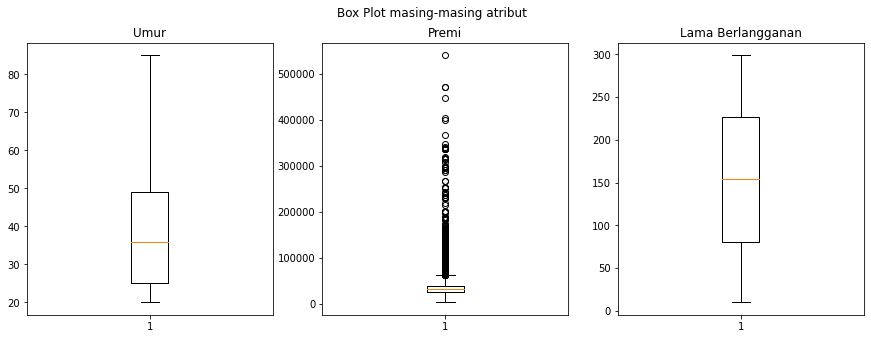

In [8]:
fig, (g1, g2, g3) = plt.subplots(1,3)
fig.suptitle("Box Plot masing-masing atribut")
fig.set_size_inches(15,5)
g1.boxplot(df_dropna_dropcategorical["Umur"])
g1.set_title("Umur")
g2.boxplot(df_dropna_dropcategorical["Premi"])
g2.set_title("Premi")
g3.boxplot(df_dropna_dropcategorical["Lama_Berlangganan"])
g3.set_title("Lama Berlangganan")

Terlihat sangat jelas ada outlier di dalam tabel premi. Kita akan menghilangkan outlier-outlier tersebut menggunakan metode IQR

In [38]:
describe = df_dropna_dropcategorical.describe()
describe

,id,Umur,Premi,Lama_Berlangganan,Tertarik
count,171068.000000,171068.000000,171068.000000,171068.000000,171068.000000
mean,142794.020729,38.818137,30506.747282,154.253063,0.121577
std,82491.716355,15.531695,17090.409733,83.862579,0.326798
min,1.000000,20.000000,2630.000000,10.000000,0.000000
25%,71350.750000,25.000000,24369.750000,81.000000,0.000000
50%,142768.000000,36.000000,31603.000000,154.000000,0.000000
75%,214070.250000,49.000000,39323.250000,227.000000,0.000000
max,285831.000000,85.000000,540165.000000,299.000000,1.000000


In [39]:
iqr_premi = float(describe["Premi"].loc["75%"] - describe["Premi"].loc["25%"])
q1_bound = float(describe["Premi"].loc["25%"]) - (iqr_premi * 1.5)
q2_bound = float(describe["Premi"].loc["75%"]) + (iqr_premi * 1.5)
final_df = df_dropna_dropcategorical.copy()
final_df.reset_index(drop=True, inplace=True)
final_df = final_df[(final_df["Premi"] > q1_bound) & (final_df["Premi"] < q2_bound)]

Text(0.5, 1.0, 'Lama Berlangganan')

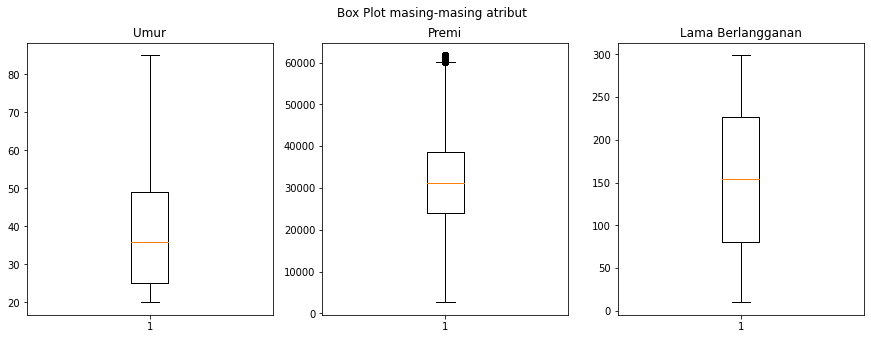

In [40]:
fig, (g1, g2, g3) = plt.subplots(1,3)
fig.suptitle("Box Plot masing-masing atribut")
fig.set_size_inches(15,5)
g1.boxplot(final_df["Umur"])
g1.set_title("Umur")
g2.boxplot(final_df["Premi"])
g2.set_title("Premi")
g3.boxplot(final_df["Lama_Berlangganan"])
g3.set_title("Lama Berlangganan")

### Penghapusan Data Kategorikal dan Set Index pada id
Hal ini dilakukan karena saya menggunakan algoritma K-Means yang tidak cocok pada data kategorikal dan ordinal

In [42]:
final_reset = final_df.set_index("id")
final_output = final_reset["Tertarik"]
final_input = final_reset.drop(columns="Tertarik", axis=1)

### Save Data Preprocessing ke csv

In [43]:
final_output.to_csv("../data/processed/output_processed.csv")
final_input.to_csv("../data/processed/input_processed.csv")
final_reset.to_csv("../data/processed/combined.csv")

## K-Means Clustering
  
1. Buat titik random sebanyak  _k_ dalam range min-max setiap atribut  
2. Hitung setiap record dalam data menggunakan eucledian distance (ini bisa diganti perhitungannya) dari record ke setiap titik.
3. Masukkan setiap record tersebut kedelam kelas titik yang terdekat.  
4. Hitung rata-rata pada setiap kelas tersebut dan jadikan titik baru.  
5. Ulangi ke langkah 2 samapai kovergen atau dengan threshold tertentu 

### Import Library

In [60]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [61]:
import numpy as np
import pandas as pd
import pickle
import random
import math
from sklearn.preprocessing import MinMaxScaler

### Import Data

In [151]:
df_training = pd.read_csv("../data/processed/input_processed.csv")
df_training.set_index("id", inplace=True)

In [152]:
df_training

,Umur,Premi,Lama_Berlangganan
id,,,
1,30.0,28029.0,97.0
2,48.0,25800.0,158.0
4,58.0,2630.0,63.0
6,21.0,22735.0,171.0
9,20.0,30786.0,31.0
...,...,...,...
285827,23.0,25988.0,217.0
285828,21.0,44686.0,50.0
285829,23.0,49751.0,226.0


### Nyoba ngolah data yang kategorikal :v

In [2]:
df_bruh = pd.read_csv("../data/processed/combined_ada_kategorikal.csv")
df_bruh.dropna(inplace=True)
df_bruh.drop(axis=1, columns="Tertarik", inplace=True)
df_bruh.set_index("id", inplace=True)
df_bruh_2 = df_bruh.filter(["Umur", "Kanal_Penjualan"])

### Nyoba data 2 dimensi, Premi dengan lama Berlangganan

In [55]:
df_training = pd.read_csv("../data/processed/input_processed.csv")
df_training.set_index("id", inplace=True)
df_training.drop(columns="Umur", axis=1, inplace=True)
df_training.to_csv("../data/processed/input_processed_premi_lama-berlangganan.csv")

DF -> Blackbox -> Prediction

In [62]:
class KMeans:
  training_arr = None
  point = None
  inertia = None
  
  def __init__(self, df: pd.DataFrame):
    '''
    Kelas ini digunakan untuk menyiapkan dataframe yang akan ditraining.
    Pastikan kolom bernama id atau sejenis sudah di drop tidak termasuk ke dalam dataframe.
    '''
    print("K-Means akan ditentukan oleh atribut-atribut di bawah ini:")
    print("[", end="")
    for i in range(len(df.columns)):
      print(df.columns[i] + " ", end="")
    print("]", end="\n")
    self.training_arr = df.to_numpy()
    
  def fit_predict(self, k_num:int = 3, max_step:int = 500, conv_threshold: float = 1e-5) -> np.array:
    '''
    Membuat model KMeans dengan K tertentu. Akan mengkembalikan hasil prediksi cluster.
    Poin kluster akan disimpan pada variable point
    '''
    point = np.zeros((k_num, len(self.training_arr[0])))
    
    # Setting up cluster arry for every record
    cluster = np.zeros(len(self.training_arr))
    
    # normalize data
    data = self.__normalize_data__(self.training_arr)
    
    # Setting up random point ( only do this once )
    for i in range(len(point)):
      point[i] = data[random.randrange(0, len(data))]
        
    # Setup convergence and counter
    convergence = False
    step = 0 
        
    while not convergence and (step < max_step):
      initial_point = point
      distance = self.__calculate_distance__(data, point)
      cluster = self.__clustering__(distance)
      new_point = self.__point_nomralization__(data, point, cluster)
      convergence = self.__convergence_check__(initial_point, new_point, conv_threshold)
      
      if convergence:
        print("It's convergence!")
      else:
        point = new_point
        step += 1
        print("STEP:", step)
      
    
    self.inertia = self.__calculate_inertia__(data, cluster, point)
    self.point = self.__denormalize_point__(point, self.training_arr)
    return cluster
  
#   def predict(self, x: np.array) -> (np.array, np.array):
#     '''
#       x: iterable
#       Fungsi ini digunakan untuk mempredict dari jenis data yang sama dan mengembalikan
#       nilai cluster pada setiap recordnya.
#     '''
#     # Check if the have the same column
#     if len(self.training_arr[0]) != len(x[0]):
#       raise "Bentuk tidak sama, harus berbentuk [" + str(len(self.training_arr[0])) + "]"  
#     if point == None:
#       raise "Point belum diinisialisasikan"
    
#     distance = self.__calculate_distance__(x, self.point)
#     cluster = self.__clustering__(distance)
    
#     inertia = self.__calculate_inertia__(x, cluster, self.point)
    
#     return cluster, inertia
    
  # Made by Kaenova Mahendra Auditama | 1301190324 | IF-43-02
  def get_cluster_centroid(self) -> np.array:
    '''
    Fungsi ini digunakan untuk mengambil point
    '''
    if type(self.point) == "NoneType":
      print("Nothing returned, point not initialize. Try using fit_predict first.")
      return
    return self.point
  
  def __clustering__(self, distance: np.array) -> np.array:
    '''
    Fungsi ini akan mengembalikan hasil clustering berdasarkan distance
    '''
    cluster = np.zeros(len(distance))
    for i in range(len(cluster)):
      cluster[i] = np.argmin(distance[i])
    return cluster
  # Made by Kaenova Mahendra Auditama | 1301190324 | IF-43-02
  def __calculate_distance__(self, data:np.array, point: np.array) -> np.array:
    '''
    Fungsi ini akan menghitung setiap titik dengan point dan mengkembalikan jarak dari titik ke point
    '''
    distance = np.zeros((len(data), len(point)))
    
    for i in range(len(data)):
      current_record = data[i]
      for j in range(len(point)):
        current_point = point[j]
        # numpy eucledience distance
        distance[i][j] = np.linalg.norm(current_point - current_record)
    
    return distance
  
  def __point_nomralization__(self, data:np.array, point:np.array, cluster:np.array) -> (np.array, np.array):
    '''
    Fungsi ini digunakan untuk clustering dan normalisasi point
    '''
    new_point = np.zeros((len(point), len(point[0])))
    counter_array = np.zeros(len(point))
    for i in range(len(cluster)):
      new_point[int(cluster[i])] = new_point[int(cluster[i])] + data[i]
      counter_array[int(cluster[i])] += 1
      
    unique_on_cluster = np.unique(cluster)
    for i in range(len(point)):
      # nan handling
      if i not in unique_on_cluster:
        new_point[i] = point[i]
      else:
        new_point[i] = np.true_divide(new_point[i], counter_array[i])
      
    return new_point
  # Made by Kaenova Mahendra Auditama | 1301190324 | IF-43-02
  def __convergence_check__(self, points1: np.array, points2:np.array, threshold: float) -> bool:
    '''
    Fungsi ini untuk mengecek convergence berdasarkan threshold yang dibuat.
    titik cluster pertama akan dibandingkan dengan titik cluster kedua.
    note: maybe i should use euclediance distance insted of menghitung satu-satu
    '''
    local_convergence = False
    normalize_threshold_positive, normalize_threshold_negative  = 1 + threshold, 1 - threshold
    points_counter = 0
    center = np.zeros(len(points1[0]))
    for i in range(len(points1)):
      current_first_point, current_second_point = points1[i], points2[i]
      distance_first_point, distance_second_point = np.linalg.norm(current_first_point - center), np.linalg.norm(current_second_point - center)
      distance_threshold_positive = distance_first_point * normalize_threshold_positive
      distance_threshold_negative = distance_first_point * normalize_threshold_negative
      if distance_threshold_positive > distance_second_point and distance_threshold_negative < distance_second_point:
        points_counter += 1
    
    if points_counter == len(points1):
      local_convergence = True
    
    return local_convergence
  
  def __calculate_inertia__(self, data:np.array, cluster:np.array, points:np.array) -> np.array:
    '''
    K-Means: Inertia
    Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
    ref: https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet
    '''
    inertia = 0
    for i in range(len(data)):
      inertia += math.sqrt(np.linalg.norm(data[i] - points[int(cluster[i])]))
      
    return inertia
  
  def __normalize_data__(self, data:np.array) -> np.array:
    '''
    Fungsi ini digunakan untuk menormalisasikan data dengan menggunakan min-max scaling. Sehingga data berjenis dan bersatuan apapun data diproses dengan baik.
    '''
    data = data.copy()
    for i in range(len(data[0])):
      col_arr = data[:,i]
      minmax = MinMaxScaler()
      normalize = minmax.fit_transform(col_arr.reshape(-1,1)).reshape(1,-1)
      data[:, i] = normalize[0]
      
    return data
  
  def __denormalize_point__(self, data:np.array, original_data:np.array) -> np.array:
    '''
    Fungsi ini digunakan untuk mendenormalisasikan point-point yang sudah dihitung menggunakan data yang ternormalisasi
    '''
    for i in range(len(data[0])):
      col_arr = data[:,i]
      col_arr_ori = original_data[:, i]
      
      minimums = min(col_arr_ori)
      maximums = max(col_arr_ori)
      for j in range(len(col_arr)):
        col_arr[j] = ((col_arr[j]*(maximums - minimums)) + minimums)
      data[:, i] = col_arr
    return data

### Multiple run to search the best K and 

In [64]:
MAX_K = 10

import pandas as pd

df = pd.read_csv("../data/processed/input_processed_premi_lama-berlangganan.csv", index_col="id")

k_run_history = {
  "data" : "../data/processed/input_processed.csv", 
  "k_runs" : {}
}

for i in range(1, MAX_K+1):
  print("==== K:", i, "====" )
  run_data = {
    "points" : None,
    "cluster" : None,
    "inertia" : None
  }
  
  model = KMeans(df)
  run_data["cluster"] = model.fit_predict(k_num=i, conv_threshold=1e-15)
  run_data["inertia"] = model.inertia
  run_data["points"] = model.point
  k_run_history["k_runs"][i] = run_data

==== K: 1 ====
K-Means akan ditentukan oleh atribut-atribut di bawah ini:
[Premi Lama_Berlangganan ]
STEP: 1
It's convergence!
==== K: 2 ====
K-Means akan ditentukan oleh atribut-atribut di bawah ini:
[Premi Lama_Berlangganan ]
STEP: 1
STEP: 2
STEP: 3
STEP: 4
STEP: 5
STEP: 6
STEP: 7
STEP: 8
STEP: 9
It's convergence!
==== K: 3 ====
K-Means akan ditentukan oleh atribut-atribut di bawah ini:
[Premi Lama_Berlangganan ]
STEP: 1
STEP: 2
STEP: 3
STEP: 4
STEP: 5
STEP: 6
STEP: 7
STEP: 8
STEP: 9
STEP: 10
STEP: 11
STEP: 12
STEP: 13
STEP: 14
STEP: 15
It's convergence!
==== K: 4 ====
K-Means akan ditentukan oleh atribut-atribut di bawah ini:
[Premi Lama_Berlangganan ]
STEP: 1
STEP: 2
STEP: 3
STEP: 4
STEP: 5
STEP: 6
STEP: 7
STEP: 8
STEP: 9
STEP: 10
STEP: 11
It's convergence!
==== K: 5 ====
K-Means akan ditentukan oleh atribut-atribut di bawah ini:
[Premi Lama_Berlangganan ]
STEP: 1
STEP: 2
STEP: 3
STEP: 4
STEP: 5
STEP: 6
STEP: 7
STEP: 8
STEP: 9
STEP: 10
STEP: 11
STEP: 12
STEP: 13
STEP: 14
STEP: 15
S

In [66]:
FILE_NAME = "premi_lama-berlangganan_10k.pckl"
f = open('./saved_vars/'+FILE_NAME, 'wb')
pickle.dump(k_run_history, f)
f.close()

## Analisa Clustering

### Import Library and Variables

In [69]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
LOAD_FILE_NAME = "./saved_vars/premi_lama-berlangganan_10k.pckl"
f = open(LOAD_FILE_NAME, 'rb')
obj = pickle.load(f)
f.close()

### Searching for best _k_ values using Elbow Method

In [71]:
# Get inertia value on each runs
inertia_list = []
for i in obj["k_runs"].keys():
  inertia_list.append(obj["k_runs"][i]["inertia"])

Text(0.5, 1.0, 'Performance on K Values')

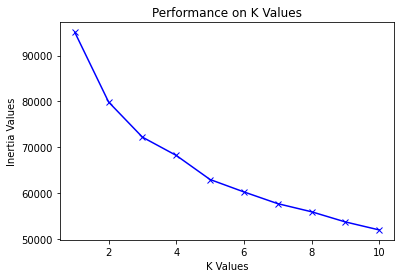

In [72]:
plt.plot([i for i in obj["k_runs"].keys()], inertia_list, 'bx-')
plt.xlabel("K Values")
plt.ylabel("Inertia Values")
plt.title("Performance on K Values")

Dilihat dari grafik di atas, nilai `k=3` merupakan yang terbaik, dikarenakan perubahan yang besar dari antara nilai `k=2` dan `k=4`.

### Memasukkan cluster ke dalam data

In [73]:
df_sementara = pd.read_csv(obj["data"])
df_sementara.head()

,id,Umur,Premi,Lama_Berlangganan
0,1,30.0,28029.0,97.0
1,2,48.0,25800.0,158.0
2,4,58.0,2630.0,63.0
3,6,21.0,22735.0,171.0
4,9,20.0,30786.0,31.0


In [74]:
df_asli = pd.read_csv("../data/processed/combined.csv")
df_asli.head()

,id,Umur,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,28029.0,97.0,0
1,2,48.0,25800.0,158.0,0
2,4,58.0,2630.0,63.0,0
3,6,21.0,22735.0,171.0,0
4,9,20.0,30786.0,31.0,0


In [76]:
obj

{'data': '../data/processed/input_processed.csv',
 'k_runs': {1: {'points': array([[29214.08429289,   154.30959879]]),
   'cluster': array([0., 0., 0., ..., 0., 0., 0.]),
   'inertia': 95099.02493609258},
  2: {'points': array([[29161.36451845,    81.92763536],
          [29267.16267065,   227.18390902]]),
   'cluster': array([0., 1., 0., ..., 1., 1., 0.]),
   'inertia': 79876.79911330466},
  3: {'points': array([[35057.34549505,   227.61918532],
          [34993.97767569,    81.39195973],
          [ 3302.66535446,   154.27769576]]),
   'cluster': array([1., 0., 2., ..., 0., 0., 1.]),
   'inertia': 72215.25825166656},
  4: {'points': array([[ 3561.08861893,    81.87461637],
          [ 3524.21141417,   227.01880817],
          [35138.02389063,   227.14476569],
          [35097.77363948,    81.86223586]]),
   'cluster': array([3., 2., 0., ..., 2., 2., 3.]),
   'inertia': 68230.9666667577},
  5: {'points': array([[ 3307.18097737,   227.09321089],
          [ 3333.5971564 ,    81.8752840

In [19]:
df_asli["cluster"] = obj["k_runs"][4]["cluster"]
df_asli.head()

,id,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
0,1,30.0,28029.0,97.0,0,0.0
1,2,48.0,25800.0,158.0,0,3.0
2,4,58.0,2630.0,63.0,0,1.0
3,6,21.0,22735.0,171.0,0,2.0
4,9,20.0,30786.0,31.0,0,0.0


In [20]:
df_asli.to_csv("../data/processed/input_processed_clustered.csv", index=False)

### Analisis Cluster

array([0., 3., 1., 2.])

In [45]:
df_asli_indexset = df_asli.set_index("id")
df_cluster = {}
for i in df_asli_indexset["cluster"].unique():
  df_cluster[i] = df_asli_indexset[df_asli_indexset["cluster"] == i]

In [46]:
df_cluster[0].describe()

,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
count,51734.000000,51734.000000,51734.000000,51734.000000,51734.0
mean,31.380214,33741.817857,76.210403,0.109425,0.0
std,9.740323,8473.779865,41.001126,0.312175,0.0
min,20.000000,11644.000000,10.000000,0.000000,0.0
25%,23.000000,27632.250000,40.000000,0.000000,0.0
50%,27.000000,32414.500000,74.000000,0.000000,0.0
75%,40.000000,38595.000000,110.000000,0.000000,0.0
max,63.000000,61739.000000,154.000000,1.000000,0.0


In [47]:
df_cluster[1].describe()

,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
count,29793.000000,29793.000000,29793.000000,29793.000000,29793.0
mean,41.040580,2940.444937,154.254489,0.130198,1.0
std,14.866473,2214.047588,83.049134,0.336527,0.0
min,20.000000,2630.000000,10.000000,0.000000,1.0
25%,28.000000,2630.000000,83.000000,0.000000,1.0
50%,40.000000,2630.000000,154.000000,0.000000,1.0
75%,51.000000,2630.000000,226.000000,0.000000,1.0
max,85.000000,23586.000000,299.000000,1.000000,1.0


In [48]:
df_cluster[2].describe()

,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
count,50932.000000,50932.000000,50932.000000,50932.000000,50932.0
mean,30.902439,33742.170895,232.098818,0.108458,2.0
std,9.422056,8451.409178,41.420719,0.310961,0.0
min,20.000000,12351.000000,154.000000,0.000000,2.0
25%,23.000000,27685.000000,198.000000,0.000000,2.0
50%,27.000000,32424.000000,235.000000,0.000000,2.0
75%,39.000000,38624.000000,268.000000,0.000000,2.0
max,62.000000,61746.000000,299.000000,1.000000,2.0


In [51]:
df_cluster[3].describe()

,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
count,33937.000000,33937.000000,33937.000000,33937.000000,33937.0
mean,59.343283,38581.684916,156.668828,0.149365,3.0
std,9.810232,9321.892894,69.953976,0.356453,0.0
min,36.000000,13964.000000,10.000000,0.000000,3.0
25%,52.000000,31494.000000,107.000000,0.000000,3.0
50%,59.000000,37645.000000,157.000000,0.000000,3.0
75%,67.000000,45021.000000,208.000000,0.000000,3.0
max,85.000000,61748.000000,299.000000,1.000000,3.0


In [49]:
df_asli[df_asli["cluster"] == 1]

,id,Umur,Premi,Lama_Berlangganan,Tertarik,cluster
2,4,58.0,2630.0,63.0,0,1.0
7,16,31.0,2630.0,132.0,0,1.0
11,20,52.0,2630.0,11.0,1,1.0
20,35,34.0,2630.0,214.0,1,1.0
21,38,44.0,2630.0,170.0,0,1.0
...,...,...,...,...,...,...
166365,285781,27.0,16588.0,130.0,0,1.0
166367,285785,47.0,2630.0,162.0,0,1.0
166372,285796,46.0,2630.0,56.0,0,1.0
166379,285809,25.0,2630.0,39.0,0,1.0


KeyError: 'cluster'

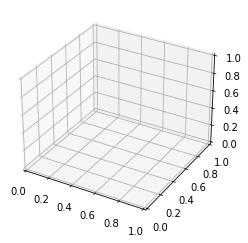

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df_asli['Umur'])
y = np.array(df_asli['Premi'])
z = np.array(df_asli['Lama_Berlangganan'])

ax.scatter(x,y,z, marker="s", c=df_asli["cluster"], s=40, cmap="Set1")
ax.set_xlabel("Umur")
ax.set_ylabel("Premi")
ax.set_zlabel("Lama_Berlangganan")
ax.set_title("Hasil Clustering")
fig.set_size_inches((10,10))
plt.show()

Ditemukan hasil clustering yang kurang baik, mungkin karena satuan yang tidak sama dengan magnitud yang besar